In [ ]:
import matplotlib
import pandas as pd


In [ ]:
!pip install deap
!apt install libgraphviz-dev
!pip install pygraphviz


     |████████████████████████████████| 160 kB 5.3 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.

In [ ]:
import random
import time
import turtle
import operator
import random
import numpy as np
import math
import pygraphviz as pgv
from functools import partial


from deap import base
from deap import creator
from deap import tools
from deap import gp
from deap import algorithms

In [ ]:
XSIZE = YSIZE = 16 # Number of grid cells in each direction (do not change this)

In [ ]:
HEADLESS = True

In [ ]:
class DisplayGame:
    def __init__(self, XSIZE, YSIZE):
        # SCREEN
        self.win = turtle.Screen()
        self.win.title("EVCO Snake game")
        self.win.bgcolor("grey")
        self.win.setup(width=(XSIZE*20)+40,height=(YSIZE*20)+40)
        #self.win.screensize((XSIZE*20)+20,(YSIZE*20)+20)
        self.win.tracer(0)

        #Snake Head
        self.head = turtle.Turtle()
        self.head.shape("square")
        self.head.color("black")

        # Snake food
        self.food = turtle.Turtle()
        self.food.shape("circle")
        self.food.color("yellow")
        self.food.penup()
        self.food.shapesize(0.55, 0.55)
        self.segments = []

    def reset(self, snake):
        self.segments = []
        self.head.penup()
        self.food.goto(-500, -500)
        self.head.goto(-500, -500)
        for i in range(len(snake)-1):
            self.add_snake_segment()
        self.update_segment_positions(snake)
       
    def update_food(self,new_food):
        self.food.goto(((new_food[1]-9)*20)+20, (((9-new_food[0])*20)-10)-20)
        
    def update_segment_positions(self, snake):
        self.head.goto(((snake[0][1]-9)*20)+20, (((9-snake[0][0])*20)-10)-20)
        for i in range(len(self.segments)):
            self.segments[i].goto(((snake[i+1][1]-9)*20)+20, (((9-snake[i+1][0])*20)-10)-20)

    def add_snake_segment(self):
        self.new_segment = turtle.Turtle()
        self.new_segment.speed(0)
        self.new_segment.shape("square")
        self.new_segment.color(random.choice(["green",'black','red','blue']))
        self.new_segment.penup()
        self.segments.append(self.new_segment)

In [ ]:
class snake:
  def __init__(self, _XSIZE, _YSIZE):
        self.XSIZE = _XSIZE
        self.YSIZE = _YSIZE
        self.reset()

  def reset(self):
      self.snake = [[8, 10], [8, 9], [8, 8], [8, 7], [8, 6], [8, 5], [8, 4], [8, 3], [8, 2], [8, 1],
                    [8, 0]]  # Initial snake co-ordinates [ypos,xpos]
      self.food = self.place_food()
      self.ahead = []
      self.left = []
      self.right = []
      self.up = []
      self.down = []
      self.snake_direction = "right"

  def place_food(self):
      self.food = [random.randint(1, (YSIZE - 2)), random.randint(1, (XSIZE - 2))]
      while (self.food in self.snake):
          self.food = [random.randint(1, (YSIZE - 2)), random.randint(1, (XSIZE - 2))]
      return (self.food)

  def update_snake_position(self):
      self.snake.insert(0, [
          self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1),
          self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)])

  def food_eaten(self):
      if self.snake[0] == self.food:  # When snake eats the food
          return True
      else:
          last = self.snake.pop()  # [1] If it does not eat the food, it moves forward and so last tail item is removed
          return False

  def snake_turns_into_self(self):
      if self.snake[0] in self.snake[1:]:
          return True
      else:
          return False

  def snake_hit_wall(self):
      if self.snake[0][0] == 0 or self.snake[0][0] == (YSIZE - 1) or self.snake[0][1] == 0 or self.snake[0][1] == (
              XSIZE - 1):
          return True
      else:
          return False

  def getAheadLocation(self):
      self.ahead = [self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1),
                    self.snake[0][1] + (self.snake_direction == "left" and -1) + (
                                self.snake_direction == "right" and 1)]

  def getLeftLocation(self):
      self.left = [self.snake[0][0], self.snake[0][1]-1]

  def getRightLocation(self):
      self.right = [self.snake[0][0], self.snake[0][1]+1]

  def getUpLocation(self):
      self.up = [self.snake[0][0] +1, self.snake[0][1]]

  def getDownLocation(self):
    self.down = [self.snake[0][0] -1, self.snake[0][1]]

  def move_up(self):
    self.snake_direction = "up"

  def move_down(self):
    self.snake_direction = "down"
  
  def move_left(self):
    self.snake_direction = "left"

  def move_right(self):
    self.snake_direction = "right"

  def sense_food_up(self):
      return self.food[0] > self.snake[0][0]
        
  def sense_food_right(self):
      return self.food[1] > self.snake[0][1]

  def sense_danger_left(self):
      self.getLeftLocation()
      # return (self.left[0] == 0 or self.left[0] == (YSIZE - 1) or self.left[1] == 0 or self.left[1] == (
      #         XSIZE - 1) or self.left in self.snake)
      return self.left[1] == 0 or self.left in self.snake
      
  def sense_danger_right(self):
      self.getRightLocation()
    # return (self.right[0] == 0 or self.right[0] == (YSIZE - 1) or self.right[1] == 0 or self.right[1] == (
    #           XSIZE - 1) or self.right in self.snake)
      return self.right[1] == XSIZE -1 or self.right in self.snake 
    
  def sense_danger_up(self):
      self.getUpLocation()
      return self.up[0] == (YSIZE-1) or self.up in self.snake

  def sense_danger_down(self):
      self.getDownLocation()
      return self.down[0] == 0 or self.down in self.snake
    
  def sense_danger_two_ahead(self):
    self.getAheadLocation()
    return (self.ahead[0] == 1 or self.ahead[0] == (YSIZE) or self.ahead[1] == 1 or self.ahead[1] == (
              XSIZE) and self.ahead != self.food) or (((self.ahead[0] + 1), self.ahead[1]) in self.snake or (self.ahead[0], (self.ahead[1] + 1)) in self.snake 
            or ((self.ahead[0] + 1), (self.ahead[1] + 2)) in self.snake and self.ahead != self.food)


  def moving_up(self):
    return self.snake_direction == "up"
  
  def moving_down(self):
    return self.snake_direction == "down"

  def moving_right(self):
    return self.snake_direction == "right"
  
  def moving_left(self):
    return self.snake_direction == "left"

  def if_food_right(self, out1, out2):
      return partial(if_then_else, self.sense_food_right, out1, out2)

  def if_food_up(self, out1, out2):
      return partial(if_then_else, self.sense_food_up, out1, out2)

  def if_danger_left(self, out1, out2):
    return partial(if_then_else, self.sense_danger_left, out1, out2)

  def if_danger_right(self, out1, out2):
    return partial(if_then_else, self.sense_danger_right, out1, out2)

  def if_danger_up(self, out1, out2):
    return partial(if_then_else, self.sense_danger_up, out1, out2)
  
  def if_danger_down(self, out1, out2):
    return partial(if_then_else, self.sense_danger_down, out1, out2)

  def if_moving_up(self, out1, out2):
    return partial(if_then_else, self.moving_up, out1, out2)

  def if_moving_down(self, out1, out2):
    return partial(if_then_else, self.moving_down, out1, out2)

  def if_moving_right(self, out1, out2):
    return partial(if_then_else, self.moving_right, out1, out2)
  
  def if_moving_left(self, out1, out2):
    return partial(if_then_else, self.moving_left, out1, out2)

  def if_danger_two_ahead(self,out1,out2):
    return partial(if_then_else, self.sense_danger_two_ahead, out1, out2)
  

In [ ]:
snake_game = snake(XSIZE,YSIZE)

In [ ]:
if not HEADLESS:
    display = DisplayGame(XSIZE,YSIZE)

In [ ]:
def run_game(display,snake_game, routine, headless):
    numRuns = 3
    totalScore = 0
    totalTimer = 0
    for i in range(numRuns):
        score = 0
        snake_game.reset()
        if not headless:
            display.reset(snake_game.snake)
            display.win.update()
        snake_game.place_food()
        game_over = False
        snake_direction = "right"

        flag = True
        timer = 0
        while not game_over:
            # using routine
            routine()
            snake_game.update_snake_position()

            timer += 1
            # Check if food is eaten
            if snake_game.food_eaten():
                snake_game.place_food()
                score += 1
                timer = 0
                if not headless:
                    display.add_snake_segment()

            # Game over if the snake runs over itself
            if snake_game.snake_turns_into_self():
                game_over = True
                print("Snake turned into itself!")
                snake_game.reset()
            
            if timer >= (2* snake_game.XSIZE) * snake_game.YSIZE: #added time limit for snake to starve
              game_over = True
              print("snake starved!!!!")
              snake_game.reset()

            # Game over if the snake goes through a wall
            if snake_game.snake_hit_wall():
                game_over = True
                print("Snake hit a wall!")
                snake_game.reset()

            if not headless:
                display.update_food(snake_game.food)
                display.update_segment_positions(snake_game.snake)
                display.win.update()
                time.sleep(0.2)  # Change this to modify the speed the game runs at when displayed.
        print("\nFINAL score - " + str(score))
        print()
        totalScore = totalScore +score
        totalTimer = totalTimer+timer
    if not headless:
        turtle.done()
    timer = totalTimer/numRuns
    score = totalScore/numRuns
    return timer, score


Multi objective version of the GP

In [ ]:
# runs the snake game for each individual
def evaluate_multi(individual):
    routine = gp.compile(individual, pset)
    timer, score = run_game(display, snake_game, routine, headless=True)
    if score == 0:
      timer = 10000 #want to score points but still have time minimised?
    print(timer, score)
    return timer, score

def progn(*args):
    for arg in args:
        arg()

def prog2(out1, out2):
    return partial(progn,out1,out2)

def prog3(out1, out2, out3):
    return partial(progn,out1,out2,out3)

def if_then_else(condition, out1, out2):
    out1() if condition() else out2()

#pareto front calculation
def pareto_eq(ind1, ind2):
    return np.allclose(ind1.fitness.values, ind2.fitness.values)


pset = gp.PrimitiveSet("MAIN", 0)
# Add the primitives
pset.addPrimitive(snake_game.if_danger_two_ahead, 2)
pset.addPrimitive(snake_game.if_danger_left, 2)
pset.addPrimitive(snake_game.if_danger_right, 2)
pset.addPrimitive(snake_game.if_danger_up, 2)
pset.addPrimitive(snake_game.if_danger_down, 2)

pset.addPrimitive(snake_game.if_food_up, 2)
pset.addPrimitive(snake_game.if_food_right, 2)

pset.addPrimitive(snake_game.if_moving_up, 2)
pset.addPrimitive(snake_game.if_moving_down, 2)
pset.addPrimitive(snake_game.if_moving_left, 2)
pset.addPrimitive(snake_game.if_moving_right, 2)

pset.addPrimitive(prog2, 2)
pset.addPrimitive(prog3, 3)

pset.addTerminal(snake_game.move_up)
pset.addTerminal(snake_game.move_left)
pset.addTerminal(snake_game.move_right)
pset.addTerminal(snake_game.move_down)


creator.create("FitnessMulti", base.Fitness, weights=(-1.0, 1.0))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

toolbox.register("expr_init", gp.genFull, pset=pset, min_=0, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_multi)
toolbox.register("select", tools.selNSGA2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=3)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate('mutate', gp.staticLimit(operator.attrgetter('height'), 10))
toolbox.decorate('mate', gp.staticLimit(operator.attrgetter('height'), 10))

NGEN = 300
popSize = MU = 1000
LAMBDA = 800
# LAMBDA = 400
CXPB = 0.5
MUTPB = 0.5

hof = tools.ParetoFront(similar=pareto_eq)
pop = toolbox.population(n=popSize)
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
stats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
stats.register("avg", np.mean,axis = 0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

logbook = tools.Logbook()

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof, verbose=False)

import matplotlib.pyplot as plt
%matplotlib inline
gen = logbook.chapters['fitness'].select("gen")
avgs = logbook.chapters['fitness'].select("avg")
_min = logbook.chapters['fitness'].select("min")
_max = logbook.chapters['fitness'].select("max")
stds = logbook.chapters['fitness'].select("std")

avgs
avgs_time = [item[0] for item in avgs]
avgs_score = [item[1] for item in avgs]
min = [item[1] for item in _min]
max = [item[1] for item in _max]
stdv = [item[1] for item in stds]

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14) 
plt.rc('legend', fontsize=14)

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs_time)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness (time)")

fig2, ax2 = plt.subplots()
line2 = ax2.plot(gen, avgs_score)
ax2.set_xlabel("Generation")
ax2.set_ylabel("Fitness (score)")
line3 = ax2.plot(gen, min)
line4 = ax2.plot(gen, max)


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Streaming output truncated to the last 5000 lines.
Snake hit a wall!

FINAL score - 0

10000 0.0
Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

10000 0.0
Snake turned into itself!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

10000 0.0
Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

10000 0.0
Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

10000 0.0
Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

10000 0.0
Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

10000 0.0
Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

Snake hit a wall!

FINAL score - 0

10000 0.0
Snake turned into itself!

FINAL score - 0

Snake turned into itself!

KeyboardInterrupt: ignored

In [ ]:
indv = tools.selBest(pop, 1)[0]
print(indv)

if_food_right(if_danger_up(move_right, if_danger_left(move_down, move_left)), prog3(move_up, move_right, if_danger_two_ahead(move_left, move_up)))


In [ ]:
nodes, edges, labels = gp.graph(indv)

tree = pgv.AGraph()
tree.add_nodes_from(nodes)
tree.add_edges_from(edges)
tree.layout(prog="dot")

for i in nodes:
    n = tree.get_node(i)
    n.attr["label"] = labels[i]

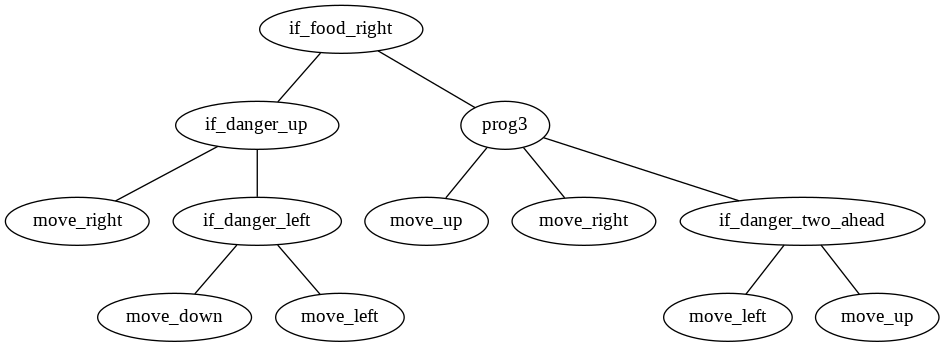

In [ ]:
from IPython.display import Image

treePlot = tree.draw(format='png', prog='dot')
Image(treePlot)

# Evaluation

Load in the data i saved earlier 

Statistics=4.000, p=0.500


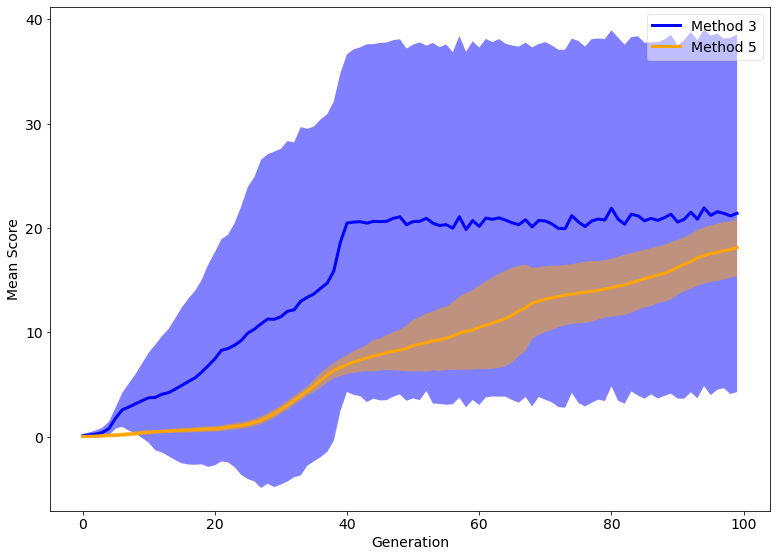

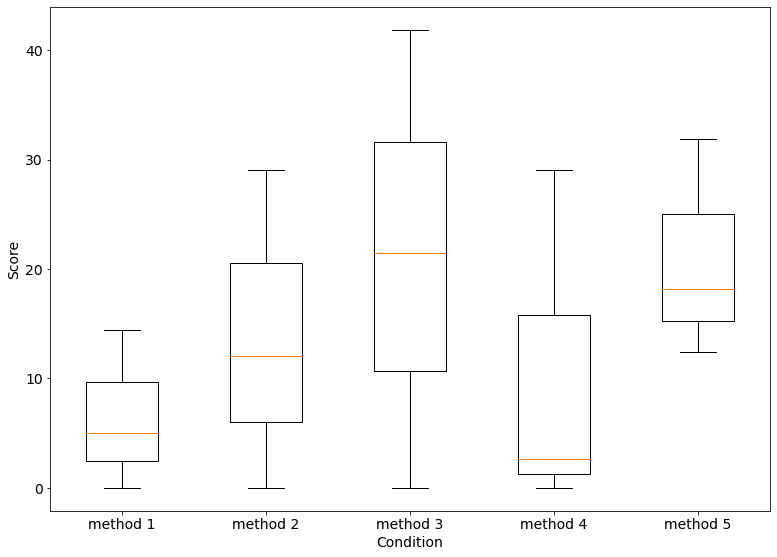

In [ ]:
method_1_avgs = np.array([0.0992, 0.16746666666666668, 0.26586666666666664, 0.35173333333333334, 0.40973333333333334, 0.4521333333333334, 0.5032666666666665, 0.5688000000000001, 0.6686666666666667, 0.8672000000000001, 1.1252666666666666, 1.3197333333333332, 1.5252666666666665, 1.65, 1.7247333333333335, 1.7998666666666665, 1.7554000000000003, 1.7789333333333333, 1.7542666666666666, 1.8456666666666663, 1.8535333333333335, 1.8934000000000002, 1.795133333333333, 1.8550666666666664, 1.9049333333333336, 2.0064, 2.0959333333333334, 2.2502000000000004, 2.3078666666666665, 2.4235333333333333, 2.4253333333333336, 2.460066666666666, 2.5751999999999997, 2.606666666666667, 2.7198, 2.7205333333333335, 2.7619999999999996, 2.801533333333334, 2.6966, 2.6745333333333337, 2.8129999999999997, 2.675266666666667, 2.759733333333334, 2.6189333333333336, 2.7377333333333334, 2.8298000000000005, 2.872266666666667, 2.863866666666667, 2.7724, 2.717133333333333, 2.852733333333333, 2.878, 2.709866666666667, 2.775666666666667, 2.773133333333333, 2.780133333333333, 2.8054, 2.9274666666666667, 2.791866666666667, 2.7969333333333335, 2.7855333333333334, 2.764066666666667, 2.812666666666667, 2.9544666666666664, 2.8246666666666664, 2.7711333333333337, 2.8882000000000003, 2.8294666666666664, 2.9394666666666667, 2.8397333333333337, 2.8118, 2.888133333333333, 2.8714, 2.9357333333333337, 2.9219999999999997, 2.856, 2.7580666666666667, 2.854733333333333, 2.886666666666666, 2.8589333333333333, 2.9181333333333335, 2.782466666666667, 2.8680666666666665, 2.8422, 2.7860000000000005, 2.897266666666667, 3.0388666666666664, 2.933466666666667, 3.0633333333333335, 3.2336, 3.285466666666667, 3.302133333333333, 3.413133333333333, 3.595866666666666, 3.5780000000000003, 3.873466666666667, 3.9076666666666666, 4.027733333333333, 4.430266666666666, 4.981733333333333])
method_1_mins = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
method_1_maxs = np.array([1.0666666666666667, 1.1333333333333333, 1.4, 1.6, 1.8, 2.0, 2.4666666666666663, 3.6, 4.066666666666667, 4.7333333333333325, 4.7333333333333325, 4.8, 5.066666666666667, 5.066666666666667, 5.066666666666667, 5.066666666666667, 5.2666666666666675, 5.2666666666666675, 5.333333333333333, 5.4, 5.533333333333333, 5.533333333333333, 5.8, 6.133333333333333, 6.133333333333333, 6.133333333333333, 6.533333333333333, 6.666666666666666, 7.2, 7.2, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.2666666666666675, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.466666666666667, 7.6, 7.6, 7.6, 7.6, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 7.7333333333333325, 8.066666666666666, 8.133333333333333, 8.6, 8.6, 9.0, 9.333333333333332, 9.333333333333332, 10.733333333333333, 10.733333333333333, 10.733333333333333, 10.733333333333333, 10.733333333333333, 10.866666666666667, 10.866666666666667, 13.2, 13.2, 14.4])
method_1_stdv = np.array([0.1541683783688759, 0.20819835627486485, 0.2729265265394496, 0.32539053458882294, 0.3802500639199303, 0.4550446864503163, 0.5365337309475001, 0.5957161889505588, 0.6518114928583434, 0.6761932662584962, 0.7161749475900114, 0.7250976945671987, 0.7525275188766632, 0.7734801584756751, 0.8283551975652313, 0.9102261013372202, 0.914077494891252, 0.9936084071034557, 1.0350389686705843, 1.1307633115142475, 1.1576289944921425, 1.2539069609291857, 1.3384428763803606, 1.4403018202214888, 1.5293571271034843, 1.7016038186239344, 2.027969729118811, 2.410001175656698, 2.669706579799028, 2.7789221731535494, 3.009573170179895, 3.357074106354454, 3.7508576648844225, 4.0136803698240735, 4.441256278727151, 4.793596086910582, 4.55728842380837, 4.503118906812133, 4.494376931233071, 4.74375415092777, 4.826293724081773, 4.670167246588832, 4.8391977181714285, 4.862244520566379, 4.726453732862396, 4.565366043496525, 4.586920039028852, 4.728729404161099, 4.5486066242556324, 4.5225101682829, 4.6779917818558765, 4.460616748587327, 4.550651967941883, 4.563308546316903, 4.522014779571896, 4.632138742884687, 4.894670105782865, 4.562338472026526, 4.757264339933193, 4.531739413416344, 4.6384162047932795, 4.453179026767781, 4.7651512742689155, 4.565059072272048, 4.575189322130105, 4.672740321386489, 4.689475675500526, 4.664582760905131, 4.6945947168584805, 4.808871882029899, 4.444542108649164, 4.653199031013204, 4.7031165908008985, 4.742576842931605, 4.606554509006101, 4.653704808477268, 4.7016662649178596, 4.843888061831689, 4.578014319670824, 4.747476230120121, 4.700888757576711, 4.730912573465903, 4.649410368829339, 4.662984249502792, 4.686189816898159, 4.722274922581747, 4.654060067415451, 4.601597983309711, 4.739967369789234, 4.516049392014121, 4.71163453591214, 4.793932171679807, 4.836734148392098, 4.613327312134799, 4.50915592002662, 4.662650545677975, 4.573401056349883, 4.75656915340365, 4.613863938657538, 4.6889647755839095])


method_2_avgs = np.array([0.09113333333333332, 0.16440000000000002, 0.24793333333333334, 0.3582666666666666, 0.46646666666666664, 0.5748, 0.7869333333333334, 1.4885333333333333, 2.9362666666666666, 3.6456000000000004, 3.8292666666666664, 3.977199999999999, 4.0656, 3.836666666666667, 4.123333333333333, 4.436733333333334, 5.092133333333334, 6.58, 7.468066666666668, 8.283266666666666, 8.163599999999999, 8.683466666666666, 8.799933333333334, 8.924600000000002, 8.799533333333333, 8.721200000000001, 9.0374, 9.4226, 9.198733333333333, 9.445066666666666, 9.2426, 9.482466666666667, 9.1842, 9.410533333333333, 9.070866666666666, 8.905733333333334, 9.377799999999999, 9.136666666666667, 9.226200000000002, 9.317866666666665, 9.387266666666667, 9.403266666666667, 9.552200000000003, 9.6254, 10.047266666666667, 10.4978, 10.951400000000001, 11.174866666666668, 10.903333333333332, 10.775533333333334, 10.838666666666668, 10.502466666666667, 10.5994, 10.825866666666666, 11.278866666666667, 11.365533333333333, 11.314866666666667, 11.557333333333336, 11.6488, 11.712466666666668, 11.539200000000001, 11.672533333333332, 11.726066666666668, 11.707466666666667, 11.837133333333334, 12.121599999999999, 11.433666666666667, 11.547933333333333, 11.784466666666667, 11.566133333333333, 12.123066666666668, 12.393600000000001, 12.655733333333334, 12.130733333333334, 12.3432, 12.6334, 12.181666666666667, 12.273799999999998, 12.4924, 12.470666666666668, 11.975333333333335, 12.2666, 12.303133333333333, 12.1612, 12.450999999999999, 12.228533333333333, 12.743533333333334, 12.7838, 13.074333333333334, 12.423800000000002, 12.769333333333332, 12.177333333333332, 11.929933333333334, 11.966666666666665, 12.112800000000002, 12.394866666666667, 12.2438, 12.391466666666668, 12.380199999999999, 12.0962])
method_2_mins = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
method_2_maxs = np.array([1.4, 1.4, 4.866666666666666, 7.333333333333333, 7.600000000000001, 10.066666666666666, 9.399999999999999, 9.466666666666667, 9.666666666666668, 10.200000000000001, 10.666666666666668, 10.8, 10.8, 14.066666666666666, 14.73333333333333, 17.333333333333332, 19.6, 21.2, 21.6, 21.6, 21.6, 21.6, 22.666666666666664, 21.933333333333334, 23.266666666666666, 22.199999999999996, 21.933333333333334, 22.0, 22.066666666666666, 22.6, 22.666666666666664, 22.666666666666664, 22.666666666666664, 23.0, 23.0, 23.0, 23.4, 23.4, 23.73333333333333, 24.133333333333333, 23.866666666666667, 24.866666666666667, 24.866666666666667, 25.333333333333336, 26.06666666666667, 26.06666666666667, 26.53333333333334, 27.26666666666667, 26.53333333333334, 26.53333333333334, 27.53333333333334, 27.133333333333336, 27.133333333333336, 27.133333333333336, 27.133333333333336, 27.133333333333336, 27.133333333333336, 27.53333333333334, 27.53333333333334, 27.53333333333334, 27.53333333333334, 27.53333333333334, 27.53333333333334, 27.53333333333334, 28.333333333333336, 28.333333333333336, 28.333333333333336, 28.333333333333336, 28.333333333333336, 28.333333333333336, 28.333333333333336, 28.333333333333336, 30.06666666666667, 28.333333333333336, 28.4, 28.4, 28.6, 28.6, 28.6, 28.6, 28.6, 28.6, 28.6, 28.6, 28.6, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.93333333333333, 28.8, 28.8, 29.06666666666667, 29.06666666666667])
method_2_stdv = np.array([0.17750086071778795, 0.2401027557803811, 0.3196830027108451, 0.40262679162387266, 0.562545701847118, 0.7026413657684046, 1.3501841438197315, 3.075456948884904, 5.041474167123916, 6.046316454393258, 6.843080649661948, 7.815659316753485, 8.29409696377155, 8.538050981082016, 8.719501610375064, 8.990793785249938, 9.360993679448068, 9.707965658273737, 9.940615138578362, 9.828348877948253, 10.117555474410691, 10.164611355088793, 10.534218507110792, 10.688354535037966, 10.836280209452772, 11.13165643558945, 11.22459972560269, 11.28708246920641, 11.255583695807754, 11.445895523432553, 11.048248483608411, 11.105862315812212, 11.258752994892465, 11.14864902627718, 11.443648136266104, 11.323211710660738, 11.648896466570939, 11.7648140137351, 11.906833500137642, 11.687885009701285, 12.034651820657066, 12.088640577004513, 11.548956643591472, 11.918816118502152, 12.040631724844562, 12.165053039113495, 11.5737215324679, 11.687776311647616, 11.87351288934043, 11.852170246649157, 11.978866928423946, 12.0031244821227, 11.9940734948557, 11.338273354733808, 11.653824627324903, 11.829458821095749, 12.039143191181747, 12.061258967822923, 11.749504008444122, 11.823166994413034, 12.146755854045054, 11.720952919167168, 11.973053374603788, 11.801385036417454, 11.94839674972709, 12.044947188667031, 11.626068619940085, 11.917188328908235, 11.847315640637287, 12.232339646290983, 12.39499378781611, 12.267504518487495, 11.876755935673494, 12.051147497230296, 12.252674338463601, 11.629170100321959, 12.240340186812164, 12.25566662133616, 12.11397301099483, 12.172699832913905, 12.322897886996115, 12.12139522130646, 12.362966202871112, 12.131129282415, 12.094175710279353, 12.250810476590244, 12.191259706126445, 12.446710855125989, 12.554044872735906, 12.28732766805794, 12.104925420854292, 12.37489752595058, 12.452558108454843, 12.332710934745856, 12.119203769225104, 12.393598706142171, 12.147008735578574, 12.463754022497929, 12.246187610844444, 12.54069329999121])

method_3_avgs = np.array([0.09013333333333333, 0.17453333333333335, 0.2652, 0.4116666666666666, 0.7957333333333333, 1.7955333333333332, 2.5824000000000007, 2.857933333333333, 3.1601333333333335, 3.4593333333333334, 3.742533333333333, 3.7698, 4.079933333333334, 4.232333333333333, 4.559066666666666, 4.924066666666667, 5.2969333333333335, 5.645933333333333, 6.189, 6.812399999999999, 7.461666666666668, 8.286733333333334, 8.462399999999999, 8.783466666666666, 9.223266666666666, 9.948866666666667, 10.318733333333332, 10.826666666666668, 11.290933333333333, 11.2608, 11.514866666666666, 12.031666666666663, 12.17553333333333, 12.9904, 13.3736, 13.6966, 14.230466666666667, 14.727799999999998, 15.883066666666668, 18.663866666666667, 20.48753333333333, 20.576599999999996, 20.615466666666666, 20.47806666666667, 20.6474, 20.620733333333334, 20.65393333333333, 20.93633333333333, 21.08566666666667, 20.325466666666664, 20.633333333333333, 20.655866666666668, 20.9394, 20.46906666666667, 20.249266666666667, 20.33813333333333, 19.995133333333335, 21.087733333333333, 19.865133333333336, 20.7202, 20.1778, 20.962399999999995, 20.8472, 20.9844, 20.76193333333333, 20.504600000000003, 20.335266666666666, 20.800133333333335, 20.119000000000003, 20.733666666666668, 20.688266666666667, 20.398066666666665, 19.96786666666667, 19.953400000000002, 21.193400000000004, 20.591266666666666, 20.155333333333335, 20.68333333333333, 20.8686, 20.776400000000002, 21.9064, 20.8562, 20.37633333333333, 21.334133333333334, 21.1764, 20.708199999999998, 20.933, 20.74573333333333, 21.0048, 21.334866666666667, 20.586199999999998, 20.841, 21.528333333333332, 20.85033333333333, 21.94206666666667, 21.225133333333332, 21.5714, 21.416333333333334, 21.174133333333334, 21.418066666666668])
method_3_mins = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
method_3_maxs = np.array([1.6, 3.333333333333333, 4.933333333333334, 6.866666666666665, 8.733333333333333, 9.266666666666666, 11.466666666666667, 12.8, 14.26666666666667, 14.26666666666667, 14.6, 14.26666666666667, 14.733333333333334, 16.73333333333333, 15.333333333333334, 18.0, 18.066666666666666, 19.333333333333332, 22.06666666666667, 21.8, 22.133333333333333, 22.26666666666667, 23.733333333333334, 24.133333333333333, 26.26666666666667, 26.4, 26.4, 27.26666666666667, 27.26666666666667, 31.26666666666667, 31.26666666666667, 31.399999999999995, 32.133333333333326, 32.533333333333324, 38.133333333333326, 38.133333333333326, 37.86666666666666, 38.13333333333334, 39.06666666666666, 39.46666666666666, 40.46666666666666, 40.266666666666666, 40.266666666666666, 40.53333333333334, 40.53333333333334, 40.53333333333334, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.666666666666664, 40.93333333333334, 40.93333333333334, 40.93333333333334, 40.93333333333334, 40.93333333333334, 41.13333333333334, 40.93333333333334, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.599999999999994, 41.599999999999994, 41.599999999999994, 41.599999999999994, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.46666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666, 41.86666666666666])
method_3_stdv = np.array([0.17934572447897631, 0.24537590210396237, 0.3429130113211415, 0.4544044943048478, 0.6644546636152086, 1.0138978690622094, 1.6131856337349677, 2.261005774232147, 2.8340311101562268, 3.568765721895706, 4.30688564974739, 5.056103022860371, 5.577774536298306, 6.085900499423967, 6.78047162404242, 7.461657367278846, 7.949591121560908, 8.324377687784768, 8.821769531486678, 9.684614229682964, 10.203855910607736, 10.643758233506308, 10.90976613966689, 11.690765662597885, 12.865145501617064, 13.997483801661563, 14.594660633259, 15.721414888969475, 15.787290964570204, 16.07217808650851, 16.085927566250778, 16.31238716436071, 16.04448503380523, 16.696297763276746, 16.145191771339643, 16.045622147835562, 16.186912680036027, 16.178876365324154, 16.263697693534105, 16.193748793901925, 16.179017673792462, 16.55343856860092, 16.715800080562502, 17.143507212806707, 16.987472181319713, 17.13157899902983, 17.135800960432388, 17.077531489585308, 17.01927392366927, 16.872963169257236, 16.951103533398648, 17.142288110595583, 16.54803993428426, 17.27837806174076, 17.096230510456586, 17.26909038330238, 16.859071989090424, 17.343260333628162, 17.035061148505847, 17.184431322824995, 17.132165897321137, 17.173000048525786, 16.98314188639232, 17.133601654837978, 16.90916463867384, 16.989314782467765, 17.062891301170374, 16.9763217453016, 17.204928076313223, 16.90892964613011, 17.141562222984355, 17.09885527032601, 17.121689675184903, 17.160523920388393, 16.97367273816195, 17.347633536979426, 17.24077329729989, 17.429085521366606, 17.30965523438677, 17.342516785185605, 17.059853845277285, 17.395852877434134, 17.207767186812923, 16.98025022391209, 17.216947564665592, 17.057226868528318, 16.85865920265046, 17.072692673128955, 17.07763880374307, 17.20268811035712, 16.926732978733178, 17.183241186303203, 17.259723185626253, 17.157047372888947, 17.074259089179957, 17.232214986278848, 17.063082927771287, 16.7490649523422, 17.078072227274365, 17.120259032308283])

method_4_avgs = np.array([287.5676666666667, 282.4174, 278.48393333333337, 275.15919999999994, 272.96999999999997, 269.75853333333333, 266.56746666666663, 263.5757333333333, 262.09426666666667, 261.8240666666667, 261.2956, 261.50486666666666, 260.70113333333336, 259.35166666666663, 258.6905333333333, 258.27160000000003, 257.5425333333333, 257.7578, 257.26533333333333, 256.52046666666666, 257.0692, 256.93853333333334, 257.2731333333333, 257.2926666666667, 256.36186666666663, 256.91746666666666, 256.6095333333334, 256.3118666666667, 256.3974666666667, 256.2854, 255.6978666666667, 255.65426666666667, 255.8376, 255.5040666666667, 255.60846666666666, 255.5972, 256.26179999999994, 255.26926666666668, 256.5898, 256.2176, 256.7362, 257.1544, 255.31193333333331, 255.37206666666665, 255.25259999999997, 256.13713333333334, 255.91219999999998, 255.43419999999998, 255.79840000000004, 256.40926666666667, 255.16333333333333, 254.942, 255.39073333333332, 254.94520000000003, 255.27833333333336, 255.10926666666668, 255.2534, 254.97619999999998, 255.10320000000002, 255.46213333333336, 255.41386666666668, 255.74680000000004, 256.2167333333333, 255.42920000000004, 255.94866666666667, 254.76246666666665, 254.64406666666665, 254.52013333333335, 253.85479999999998, 254.00773333333336, 253.79519999999997, 253.9212, 253.9067333333333, 253.2030666666667, 254.21779999999998, 253.70146666666665, 253.99099999999999, 253.34633333333332, 253.1217333333333, 253.4056666666667, 252.95826666666667, 253.54833333333335, 253.4297333333333, 253.06826666666666, 253.05073333333334, 253.88866666666664, 253.53220000000002, 253.67726666666667, 254.11520000000002, 253.86819999999997, 253.29720000000003, 253.7233333333333, 253.6998, 253.44519999999997, 253.54880000000003, 253.81733333333332, 252.7970666666667, 253.76353333333336, 253.34653333333335, 253.40166666666664])
method_4_maxs = np.array([254.73333333333335, 253.0, 252.0, 249.4, 246.86666666666665, 242.5333333333333, 242.0666666666667, 240.93333333333334, 239.53333333333336, 239.4, 238.6, 238.6, 238.6, 237.93333333333334, 235.53333333333336, 235.53333333333336, 235.33333333333334, 235.33333333333334, 235.26666666666665, 234.86666666666665, 234.86666666666665, 234.8, 234.8, 234.66666666666669, 234.66666666666669, 234.66666666666669, 234.66666666666669, 234.53333333333336, 234.53333333333336, 234.4666666666667, 234.4666666666667, 234.4666666666667, 234.4666666666667, 234.4666666666667, 234.4666666666667, 234.4666666666667, 234.33333333333334, 234.2666666666667, 234.2666666666667, 234.2666666666667, 234.2666666666667, 234.2666666666667, 234.2666666666667, 234.2666666666667, 234.2666666666667, 234.2666666666667, 234.2, 234.2, 234.2, 233.4666666666667, 233.4666666666667, 233.4, 232.6, 232.6, 232.6, 232.53333333333336, 232.53333333333336, 232.26666666666665, 232.26666666666665, 232.13333333333335, 230.86666666666665, 230.2, 229.26666666666665, 229.26666666666665, 227.8, 227.8, 227.8, 227.8, 227.8, 227.5333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333, 226.9333333333333])
method_4_mins = np.array([300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0])
method_4_stdv = np.array([19.90946329365851, 21.72281611436722, 22.29292873374485, 22.318989284439375, 22.316609988088974, 22.135783574343748, 21.82980744474913, 21.889711783714194, 22.19398099404273, 22.78864094700591, 22.849349449768944, 23.44067368765543, 23.444700752188346, 22.59987637428274, 22.500427417015644, 22.55576005650995, 22.42655443097049, 23.0814787196123, 23.36019191558189, 23.236345603823686, 23.176501595072168, 22.8869515266708, 23.366155092520692, 23.394397695479622, 22.89563479843662, 22.930382150243027, 23.062497793407893, 22.77311342618581, 22.38759587240864, 22.45366580770891, 22.127172410584187, 22.636584860561626, 22.71785172208121, 22.40270296377409, 22.107665267768652, 22.51117634708887, 22.51446857816321, 22.081360828862866, 22.699725373739177, 22.84175383693111, 23.02460867823389, 22.972266149890267, 22.539621495005957, 22.008553950556053, 22.473962307628398, 22.733436717606438, 22.903030040353176, 22.30602192851254, 22.390834886263335, 22.973532797409337, 22.636224583410034, 22.26230810366237, 22.53139825304033, 22.624002220510157, 22.781556814237582, 22.775769235709625, 22.889009025383757, 23.05676912763735, 23.242242614567918, 23.438223183817733, 23.531541691654184, 23.786658294798126, 24.393408072592415, 24.154955767743097, 25.004345149092078, 24.58735827882588, 24.879677165293636, 24.75231470243778, 24.580724803438905, 24.586457035443594, 25.126352653021446, 24.58948503920308, 25.005570355840934, 24.72880746757461, 24.778597883209443, 24.529926443984174, 24.844456118936698, 24.675628031124752, 24.74920303722797, 24.774643729581847, 24.689094301956793, 24.95456913070176, 24.412813516373085, 24.6105913746614, 24.93093177070051, 24.978806854111916, 24.81025287680884, 24.71873910777464, 24.80237627610685, 24.915744392417395, 24.730755258373982, 24.76216723700221, 24.93801474608488, 24.421226747131882, 24.86275250836878, 24.916574066235235, 24.785174029638178, 25.290776067796763, 24.908283411796894, 24.87037377592558])

method_5_avgs = np.array([0.025222222222222212, 0.04844444444444452, 0.07311111111111114, 0.10355555555555518, 0.131444444444444, 0.16355555555555587, 0.2005555555555568, 0.25355555555555664, 0.3122222222222217, 0.3875555555555525, 0.43811111111110873, 0.48222222222221994, 0.5157777777777758, 0.5543333333333318, 0.5829999999999975, 0.6217777777777742, 0.6466666666666642, 0.6796666666666634, 0.7118888888888906, 0.741555555555555, 0.7641111111111072, 0.8159999999999915, 0.9237777777777807, 1.0077777777777834, 1.079555555555561, 1.21222222222221, 1.3797777777777795, 1.5841111111111166, 1.879222222222233, 2.2351111111110953, 2.630777777777775, 3.030111111111101, 3.4951111111111124, 3.9455555555555506, 4.401111111111104, 4.882555555555557, 5.4332222222222155, 5.913999999999991, 6.348666666666645, 6.660999999999992, 6.921222222222224, 7.170777777777782, 7.366000000000015, 7.560555555555578, 7.760888888888893, 7.883888888888879, 8.080666666666664, 8.207222222222217, 8.305222222222229, 8.471666666666684, 8.742999999999975, 8.891777777777781, 9.032555555555554, 9.19744444444443, 9.305000000000005, 9.446888888888868, 9.65733333333334, 9.94577777777779, 10.104333333333347, 10.240555555555572, 10.499777777777824, 10.7028888888889, 10.900333333333355, 11.124555555555515, 11.341777777777745, 11.656888888888867, 12.07855555555556, 12.376666666666686, 12.80822222222222, 13.004666666666637, 13.198888888888874, 13.33422222222223, 13.451555555555553, 13.589666666666668, 13.67144444444447, 13.784000000000006, 13.851444444444473, 13.939444444444447, 14.03555555555557, 14.177888888888878, 14.288111111111112, 14.443888888888916, 14.555222222222236, 14.761666666666654, 14.968666666666655, 15.16444444444445, 15.316222222222201, 15.529555555555554, 15.668777777777782, 15.918555555555548, 16.243000000000006, 16.54111111111109, 16.80266666666667, 17.15233333333333, 17.371555555555542, 17.560444444444432, 17.678888888888878, 17.830666666666655, 17.953333333333315, 18.143777777777753])
method_5_mins = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.2222222222222222, 0.2222222222222222, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.5555555555555555, 0.5555555555555555, 0.6666666666666666, 0.888888888888889, 1.2222222222222223, 1.4444444444444444, 1.7777777777777777, 2.111111111111111, 2.555555555555556, 2.777777777777778, 3.111111111111111, 3.666666666666666, 4.111111111111111, 4.333333333333333, 4.555555555555555, 4.666666666666667, 4.888888888888888, 5.0, 5.111111111111111, 5.333333333333333, 5.4444444444444455, 5.4444444444444455, 5.555555555555556, 5.777777777777778, 5.888888888888888, 6.111111111111111, 6.222222222222222, 6.222222222222222, 6.333333333333333, 6.444444444444444, 6.777777777777778, 6.777777777777778, 7.0, 7.111111111111111, 7.111111111111111, 7.222222222222222, 7.333333333333333, 7.333333333333333, 7.444444444444444, 7.5555555555555545, 7.777777777777778, 7.888888888888888, 8.222222222222223, 8.444444444444445, 8.111111111111112, 8.111111111111112, 8.777777777777779, 8.88888888888889, 8.777777777777779, 9.0, 9.222222222222223, 9.444444444444445, 9.222222222222221, 9.444444444444445, 9.666666666666666, 9.666666666666666, 9.555555555555555, 9.88888888888889, 10.222222222222221, 10.222222222222221, 10.333333333333334, 10.555555555555555, 10.222222222222221, 10.555555555555555, 10.666666666666666, 11.111111111111112, 11.444444444444443, 11.111111111111112, 11.888888888888891, 12.0, 12.111111111111109, 12.222222222222223, 12.444444444444445])
method_5_maxs = np.array([1.222222222222222, 1.222222222222222, 1.3333333333333333, 1.8888888888888886, 2.5555555555555554, 2.5555555555555554, 2.5555555555555554, 2.6666666666666665, 2.888888888888889, 2.888888888888889, 2.888888888888889, 3.0, 4.111111111111111, 4.777777777777778, 4.888888888888889, 5.000000000000001, 5.000000000000001, 5.000000000000001, 5.111111111111112, 5.444444444444444, 5.666666666666667, 6.777777777777778, 8.333333333333334, 8.777777777777777, 9.333333333333332, 9.333333333333332, 10.333333333333332, 12.333333333333336, 12.555555555555557, 12.555555555555557, 12.777777777777779, 13.777777777777779, 13.777777777777779, 13.888888888888891, 14.111111111111112, 15.777777777777779, 15.777777777777779, 15.777777777777779, 16.000000000000004, 16.222222222222225, 16.222222222222225, 16.444444444444446, 16.77777777777778, 16.88888888888889, 18.77777777777778, 18.88888888888889, 18.88888888888889, 21.333333333333332, 21.444444444444443, 21.444444444444443, 21.888888888888886, 23.222222222222218, 23.222222222222218, 23.222222222222218, 23.222222222222218, 23.222222222222218, 23.222222222222218, 24.555555555555554, 24.555555555555554, 24.555555555555554, 24.555555555555554, 24.555555555555554, 24.555555555555554, 24.555555555555554, 24.555555555555554, 24.555555555555554, 27.0, 28.11111111111111, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.555555555555554, 28.888888888888886, 30.777777777777775, 30.777777777777775, 31.444444444444443, 31.444444444444443, 31.444444444444443, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889, 31.88888888888889])
method_5_stdv = np.array([0.11471655891321363, 0.14707669956711025, 0.1694694334943307, 0.18877852985266544, 0.19634861287459235, 0.20516010008446248, 0.21337890138332655, 0.22018578014435208, 0.22115957034583625, 0.21443439815269927, 0.20706949987329676, 0.17409958835869074, 0.18379215313923608, 0.20021516204101708, 0.20666236554664166, 0.22121985042536874, 0.22866180752854584, 0.2393878767931978, 0.25238770880443756, 0.2544953612325567, 0.2594832471577983, 0.27173434739751895, 0.28201635098380884, 0.30515551590769163, 0.3200520790954696, 0.3404048243554205, 0.3558637379672179, 0.36518351550966527, 0.3786453925948842, 0.399431679598234, 0.3967736550394081, 0.42640604019069644, 0.41806113322229566, 0.43490177690549103, 0.4443360840124902, 0.6041379533406712, 0.7145096220485788, 0.7269354243061094, 0.7350283441246764, 0.8424060119021624, 0.9083782251903733, 1.0496305699308512, 1.1173697289219422, 1.2509263678481448, 1.5079931844820913, 1.5328071198512565, 1.6727148591436598, 1.830043077817206, 1.973243691657667, 2.198139010870564, 2.4778626766720584, 2.603041618312477, 2.796869658902414, 2.8080683554516264, 3.0282979451243994, 3.0101032835731734, 3.2635954950876043, 3.5026798629366933, 3.668995851122714, 3.8115001275380096, 4.008398904522556, 4.210196604013246, 4.3699476732183395, 4.514190846652368, 4.5676480575650595, 4.555641667207826, 4.308474323934175, 4.138202293535477, 3.4086194011978215, 3.2325522080513487, 3.1628418831452407, 3.077946718187309, 2.945726829757906, 2.8900157439017455, 2.869516025782436, 2.8860106837409094, 2.9315457431949534, 2.910500147931818, 2.8024336844170934, 2.758889551170091, 2.781307366449572, 2.8391530622900767, 2.9047446053348995, 2.852548938133126, 2.8024696251699104, 2.759602205632778, 2.7852769860265103, 2.7214019262954228, 2.734194803268812, 2.750291378502769, 2.6379869218781273, 2.597357631645404, 2.62314518596791, 2.68548441729897, 2.7001932235387063, 2.712371635467544, 2.751510110628148, 2.7541057028048517, 2.6852320197703508, 2.7541057028048517])

#convert method 4 data to raw snake scores so it matches the others
for i in range(100):
  if method_4_avgs[i] >= XSIZE*YSIZE:
    method_4_avgs[i] = 0
  else:
    method_4_avgs[i] = (XSIZE * YSIZE) - method_4_avgs[i]
  if method_4_mins[i] >= XSIZE*YSIZE:
    method_4_mins[i] = 0
  else:
    method_4_mins[i] = (XSIZE * YSIZE) - method_4_mins[i]
  if method_4_maxs[i] >= XSIZE*YSIZE:
    method_4_maxs[i] = 0
  else:
    method_4_maxs[i] = (XSIZE * YSIZE) - method_4_maxs[i]

gens = 100
t = np.arange(gens)
#Plotting ribbon graphs of the mean and standard deviation of each method to show the confidence of each

fig1 = plt.figure(figsize =(10, 7)) 
ax = fig1.add_axes([0, 0, 1, 1]) 
ax.set_xlabel('Generation')
ax.set_ylabel('Mean Score')
ax.plot(t, method_3_avgs, lw=3, label='Method 3', color='blue')
ax.fill_between(t, method_3_avgs+method_3_stdv, method_3_avgs-method_3_stdv, facecolor='blue', alpha=0.5)
ax.plot(t, method_5_avgs, lw=3, label='Method 5', color='orange')
ax.fill_between(t, method_5_avgs+method_5_stdv, method_5_avgs-method_5_stdv, facecolor='orange', alpha=0.5)
ax.legend(loc='best', fancybox=True, framealpha=0.5)

# Plotting a box plot of the final average, min and max score of each method
bxplt_data = [[method_1_avgs[99], method_1_mins[99], method_1_maxs[99]],[method_2_avgs[99], method_2_mins[99], method_2_maxs[99]],
              [method_3_avgs[99], method_3_mins[99], method_3_maxs[99]],[method_4_avgs[99], method_4_mins[99], method_4_maxs[99]]
              ,[method_5_avgs[99], method_5_mins[99], method_5_maxs[99]]]

fig2 = plt.figure(figsize =(10, 7)) 
ax = fig2.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['method 1', 'method 2','method 3', 'method 4', 'method 5']) 

ax.set_xlabel('Condition')
ax.set_ylabel('Score')

bp = ax.boxplot(bxplt_data)

from scipy.stats import mannwhitneyu
statU, p = mannwhitneyu([method_3_avgs[99], method_3_mins[99], method_3_maxs[99]], [method_5_avgs[99], method_5_mins[99], method_5_maxs[99]])
print('Statistics=%.3f, p=%.3f' % (statU, p))